In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
data=pd.read_csv('diabetes.csv')

# Neural Network Model

## First Neural Network

In [14]:
NB_EPOCH = 200 # ile razy ćwiczyć sieć dla danego podzbioru danych
BATCH_SIZE = 32 #wielkość podzbioru
VERBOSE = 1
NB_CLASSES = 2 # number of outputs = number of digits
OPTIMIZER = Adam() 
N_HIDDEN = 8
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(data.drop('Outcome',axis=1), data['Outcome'],test_size=0.2,random_state=0)
import copy
Y_train_original=copy.copy(Y_train)
Y_test_original=copy.copy(Y_test)

Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)
#zamiast odpowiedzi 5 albo 4 mamy wektor [0,1] albo [1,0]

In [16]:
#Model with one hidden layer initialization

#model = Sequential()

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(8,))) #iN +HIDDEN
model.add(Activation('relu')) #IN -> RELU(IN)-> HIDDEN
model.add(Dense(NB_CLASSES)) #OUT
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
activation_11 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 18        
_________________________________________________________________
activation_12 (Activation)   (None, 2)                 0         
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________
Train on 491 samples, validate on 123 samples
Epoch 1/200
491/491 [==============================] - 2s 3ms/step - loss: 7.6137 - acc: 0.5071 - val_loss: 7.1286 - val_acc: 0.5285
Epoch 2/200
491/491 [==============================] - 0s 114us/step - loss: 7.3616 - acc: 0.5102 -

Epoch 55/200
491/491 [==============================] - 0s 148us/step - loss: 3.3044 - acc: 0.6629 - val_loss: 2.8635 - val_acc: 0.6911
Epoch 56/200
491/491 [==============================] - 0s 131us/step - loss: 3.2936 - acc: 0.6650 - val_loss: 2.8649 - val_acc: 0.6911
Epoch 57/200
491/491 [==============================] - 0s 191us/step - loss: 3.2932 - acc: 0.6629 - val_loss: 2.8690 - val_acc: 0.6911
Epoch 58/200
491/491 [==============================] - 0s 98us/step - loss: 3.2864 - acc: 0.6670 - val_loss: 2.8817 - val_acc: 0.6911
Epoch 59/200
491/491 [==============================] - 0s 109us/step - loss: 3.2893 - acc: 0.6670 - val_loss: 2.8723 - val_acc: 0.6870
Epoch 60/200
491/491 [==============================] - 0s 112us/step - loss: 3.2816 - acc: 0.6680 - val_loss: 2.8861 - val_acc: 0.6504
Epoch 61/200
491/491 [==============================] - 0s 112us/step - loss: 3.2798 - acc: 0.6701 - val_loss: 2.8717 - val_acc: 0.6911
Epoch 62/200
491/491 [===========================

Epoch 175/200
491/491 [==============================] - 0s 102us/step - loss: 3.2843 - acc: 0.6619 - val_loss: 2.8610 - val_acc: 0.6545
Epoch 176/200
491/491 [==============================] - 0s 106us/step - loss: 3.2596 - acc: 0.6792 - val_loss: 2.8596 - val_acc: 0.6626
Epoch 177/200
491/491 [==============================] - 0s 97us/step - loss: 3.2632 - acc: 0.6772 - val_loss: 2.8629 - val_acc: 0.6545
Epoch 178/200
491/491 [==============================] - 0s 107us/step - loss: 3.2561 - acc: 0.6823 - val_loss: 2.8544 - val_acc: 0.6911
Epoch 179/200
491/491 [==============================] - 0s 99us/step - loss: 3.2593 - acc: 0.6833 - val_loss: 2.8698 - val_acc: 0.7195
Epoch 180/200
491/491 [==============================] - 0s 98us/step - loss: 3.2550 - acc: 0.6894 - val_loss: 2.8551 - val_acc: 0.6626
Epoch 181/200
491/491 [==============================] - 0s 105us/step - loss: 3.2639 - acc: 0.6731 - val_loss: 2.8643 - val_acc: 0.6707
Epoch 182/200
491/491 [=====================

<b> IMPROVEMENT <b> : <br>
* more batches?
* more epochs?
* more layers?
* more neurons?    

<b> More batches? <b>

In [19]:
#Different batch sizes:
BATCH_SIZE=[1,32,64,128,254]
VERBOSE=0

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(8,))) #iN +HIDDEN
model.add(Activation('relu')) #IN -> RELU(IN)-> HIDDEN
model.add(Dense(NB_CLASSES)) #OUT
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

for i in BATCH_SIZE:
 
    history = model.fit(X_train, Y_train, batch_size=i, epochs=NB_EPOCH, verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)
    
    score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
    accuracy=score[1]
    
    score = model.evaluate(X_train, Y_train, verbose=VERBOSE)
    accuracy2=score[1]
    print('BATCH SIZE',i,'ACCURACY FOR TEST DATA',accuracy,'ACCURACY FOR TRAINING DATA DATA',accuracy2)

BATCH SIZE 1 ACCURACY FOR TEST DATA 0.7370129885611596 ACCURACY FOR TRAINING DATA DATA 0.7451140063205061
BATCH SIZE 32 ACCURACY FOR TEST DATA 0.7824675347897914 ACCURACY FOR TRAINING DATA DATA 0.7728013029315961
BATCH SIZE 64 ACCURACY FOR TEST DATA 0.775974023651767 ACCURACY FOR TRAINING DATA DATA 0.7744299674267101
BATCH SIZE 128 ACCURACY FOR TEST DATA 0.7824675301452736 ACCURACY FOR TRAINING DATA DATA 0.7744299674267101
BATCH SIZE 254 ACCURACY FOR TEST DATA 0.78896103663878 ACCURACY FOR TRAINING DATA DATA 0.7744299674267101


Batch size=64 seems optimal

<b> More epochs?

In [20]:
NB_EPOCH=[50,100,200,230,300,330,360,400,450,500]
BATCH_SIZE=64
VERBOSE=0
model = Sequential()

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(8,))) #iN +HIDDEN
model.add(Activation('relu')) #IN -> RELU(IN)-> HIDDEN
model.add(Dense(NB_CLASSES)) #OUT
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

for i in NB_EPOCH:
 
    history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=i, verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)
    
    score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
    accuracy=score[1]
    
    score = model.evaluate(X_train, Y_train, verbose=VERBOSE)
    accuracy2=score[1]
    print('NB EPOCH',i,'ACCURACY FOR TEST DATA',accuracy,'ACCURACY FOR TRAINING DATA DATA',accuracy2)

NB EPOCH 50 ACCURACY FOR TEST DATA 0.7142857096411965 ACCURACY FOR TRAINING DATA DATA 0.6677524428025907
NB EPOCH 100 ACCURACY FOR TEST DATA 0.7272727257245547 ACCURACY FOR TRAINING DATA DATA 0.6864820848847056
NB EPOCH 200 ACCURACY FOR TEST DATA 0.7499999976777411 ACCURACY FOR TRAINING DATA DATA 0.7247557003257329
NB EPOCH 230 ACCURACY FOR TEST DATA 0.7402597356152225 ACCURACY FOR TRAINING DATA DATA 0.739413680781759
NB EPOCH 300 ACCURACY FOR TEST DATA 0.7889610343165212 ACCURACY FOR TRAINING DATA DATA 0.7540716610436331
NB EPOCH 330 ACCURACY FOR TEST DATA 0.8019480542703108 ACCURACY FOR TRAINING DATA DATA 0.767100977392849
NB EPOCH 360 ACCURACY FOR TEST DATA 0.7954545477768044 ACCURACY FOR TRAINING DATA DATA 0.767915309640406
NB EPOCH 400 ACCURACY FOR TEST DATA 0.788961038961039 ACCURACY FOR TRAINING DATA DATA 0.767915309640406
NB EPOCH 450 ACCURACY FOR TEST DATA 0.7857142833920269 ACCURACY FOR TRAINING DATA DATA 0.776058632115976
NB EPOCH 500 ACCURACY FOR TEST DATA 0.818181815085473

More epochs doesn't gurantee better performance, 360 seems optimal

<b> More layers?

In [21]:
NB_EPOCH=350
BATCH_SIZE=64
hidden_layers=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
accuracy=[]
accuracy2=[]

for i in hidden_layers:
    
    model = Sequential()

    for j in range(0,i):
    
        model.add(Dense(N_HIDDEN, input_shape=(8,))) #iN +HIDDEN
        model.add(Activation('relu')) #IN -> RELU(IN)-> HIDDEN
        
    model.add(Dense(NB_CLASSES)) #OUT
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
 
    history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)
    
    score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
    acc=score[1]
    accuracy.append(acc)
    
    score = model.evaluate(X_train, Y_train, verbose=VERBOSE)
    acc2=score[1]
    accuracy2.append(acc2)
    print('NB OF LAYERS',i,'ACCURACY FOR TEST DATA',acc,'ACCURACY FOR TRAINING DATA DATA',acc2)

NB OF LAYERS 1 ACCURACY FOR TEST DATA 0.7370129854648144 ACCURACY FOR TRAINING DATA DATA 0.7296416938110749
NB OF LAYERS 2 ACCURACY FOR TEST DATA 0.6688311688311688 ACCURACY FOR TRAINING DATA DATA 0.6579804562202106
NB OF LAYERS 3 ACCURACY FOR TEST DATA 0.7045454545454546 ACCURACY FOR TRAINING DATA DATA 0.7671009770045452
NB OF LAYERS 4 ACCURACY FOR TEST DATA 0.6948051986756263 ACCURACY FOR TRAINING DATA DATA 0.771172638630634
NB OF LAYERS 5 ACCURACY FOR TEST DATA 0.7337662314439749 ACCURACY FOR TRAINING DATA DATA 0.8029315958970533
NB OF LAYERS 6 ACCURACY FOR TEST DATA 0.7305194781972216 ACCURACY FOR TRAINING DATA DATA 0.7117263843648208
NB OF LAYERS 7 ACCURACY FOR TEST DATA 0.7012987036209601 ACCURACY FOR TRAINING DATA DATA 0.7939739415622301
NB OF LAYERS 8 ACCURACY FOR TEST DATA 0.7824675347897914 ACCURACY FOR TRAINING DATA DATA 0.7882736158293311
NB OF LAYERS 9 ACCURACY FOR TEST DATA 0.7337662376366653 ACCURACY FOR TRAINING DATA DATA 0.7638436480143171
NB OF LAYERS 10 ACCURACY FOR 

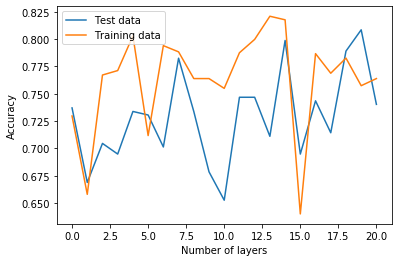

In [22]:
plt.plot(accuracy,label='Test data')
plt.plot(accuracy2,label='Training data')
plt.xlabel('Number of layers')
plt.ylabel('Accuracy')
plt.legend()

14 seems the most optimal

<b> more neurons in hidden layers?

In [25]:
N_HIDDEN=[8,9,10,11,12,13,14]
hidden_layers=14
accuracy=[]
accuracy2=[]
for i in N_HIDDEN:
    
    model = Sequential()

    for j in range(0,hidden_layers):
    
        model.add(Dense(i, input_shape=(8,))) #iN +HIDDEN
        model.add(Activation('relu')) #IN -> RELU(IN)-> HIDDEN
        
    model.add(Dense(NB_CLASSES)) #OUT
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
 
    history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)
    
    score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
    acc=score[1]
    accuracy.append(acc)
    
    score = model.evaluate(X_train, Y_train, verbose=VERBOSE)
    acc2=score[1]
    accuracy2.append(acc2)
    print('NB OF Neurons in layers',i,'ACCURACY FOR TEST DATA',acc,'ACCURACY FOR TRAINING DATA DATA',acc2)

NB OF Neurons in layers 8 ACCURACY FOR TEST DATA 0.7922077937559648 ACCURACY FOR TRAINING DATA DATA 0.767100977392849
NB OF Neurons in layers 9 ACCURACY FOR TEST DATA 0.7402597433560855 ACCURACY FOR TRAINING DATA DATA 0.8257328992169533
NB OF Neurons in layers 10 ACCURACY FOR TEST DATA 0.7597402612884323 ACCURACY FOR TRAINING DATA DATA 0.8151465796104084
NB OF Neurons in layers 11 ACCURACY FOR TEST DATA 0.7207792231014797 ACCURACY FOR TRAINING DATA DATA 0.8216612375908644
NB OF Neurons in layers 12 ACCURACY FOR TEST DATA 0.7467532483014193 ACCURACY FOR TRAINING DATA DATA 0.8110749187609272
NB OF Neurons in layers 13 ACCURACY FOR TEST DATA 0.737012989335246 ACCURACY FOR TRAINING DATA DATA 0.8615635181094614
NB OF Neurons in layers 14 ACCURACY FOR TEST DATA 0.7337662353144063 ACCURACY FOR TRAINING DATA DATA 0.8973941366136656


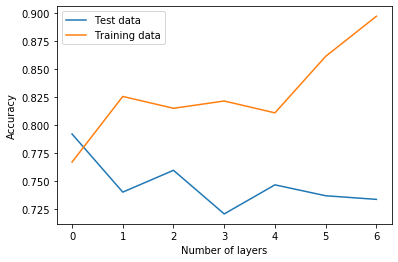

In [26]:
plt.plot(accuracy,label='Test data')
plt.plot(accuracy2,label='Training data')
plt.xlabel('Number of layers')
plt.ylabel('Accuracy')
plt.legend()

In [27]:
N_HIDDEN=[8,9,10,11,12,13,14]
hidden_layers=14
accuracy=[]
accuracy2=[]
NB_EPOCH=500
for i in N_HIDDEN:
    
    model = Sequential()

    for j in range(0,hidden_layers):
    
        model.add(Dense(i, input_shape=(8,))) #iN +HIDDEN
        model.add(Activation('relu')) #IN -> RELU(IN)-> HIDDEN
        
    model.add(Dense(NB_CLASSES)) #OUT
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
 
    history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)
    
    score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
    acc=score[1]
    accuracy.append(acc)
    
    score = model.evaluate(X_train, Y_train, verbose=VERBOSE)
    acc2=score[1]
    accuracy2.append(acc2)
    print('NB OF Neurons in layers',i,'ACCURACY FOR TEST DATA',acc,'ACCURACY FOR TRAINING DATA DATA',acc2)

NB OF Neurons in layers 8 ACCURACY FOR TEST DATA 0.71103896336122 ACCURACY FOR TRAINING DATA DATA 0.7247557003257329
NB OF Neurons in layers 9 ACCURACY FOR TEST DATA 0.7662337677819389 ACCURACY FOR TRAINING DATA DATA 0.7988599346592683
NB OF Neurons in layers 10 ACCURACY FOR TEST DATA 0.7142857127375417 ACCURACY FOR TRAINING DATA DATA 0.7817589576547231
NB OF Neurons in layers 11 ACCURACY FOR TEST DATA 0.7045454522231956 ACCURACY FOR TRAINING DATA DATA 0.8208469053433074
NB OF Neurons in layers 12 ACCURACY FOR TEST DATA 0.7597402566439145 ACCURACY FOR TRAINING DATA DATA 0.8110749183726234
NB OF Neurons in layers 13 ACCURACY FOR TEST DATA 0.7142857158338869 ACCURACY FOR TRAINING DATA DATA 0.7980456026058632
NB OF Neurons in layers 14 ACCURACY FOR TEST DATA 0.7467532436569015 ACCURACY FOR TRAINING DATA DATA 0.8965798045602605


Model seems either undertrained or the data has some rare distribution and I need to shuffle it.

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict_classes(X_test)
skplt.metrics.plot_confusion_matrix(Y_test_original, predictions, normalize=True)